In [1]:
# Import the required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import ClusterCentroids
from sklearn.svm import SVC
import utils as u
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import numpy as np
import seaborn as sns
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Read the data from the online_gaming_behavior_dataset.csv file into a Pandas DataFrame
orig_df = pd.read_csv("../Resources/online_gaming_behavior_dataset.csv")
# Review the DataFrame
orig_df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [3]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [4]:
## No null values
orig_df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [5]:
### Cleans and preprocesses the data
gaming_df = u.preprocess_and_clean(orig_df)
gaming_df

,Age,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Location_Asia,Location_Europe,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Strategy
0,43,0,1.0,6,108,79,25,1.0,0,0,0,0,0,0,0,1
1,29,0,1.0,5,144,11,10,1.0,1,0,0,1,0,0,0,1
2,22,0,0.0,16,142,35,41,2.0,1,0,0,1,0,0,0,0
3,35,1,0.0,9,85,57,47,1.0,0,0,0,1,1,0,0,0
4,33,0,1.0,2,131,95,37,1.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,0,0.0,4,75,85,14,1.0,0,0,0,1,0,0,0,1
40030,44,0,2.0,19,114,71,27,2.0,1,0,0,0,0,0,1,0
40031,15,1,0.0,10,176,29,1,2.0,1,0,0,1,0,1,0,0
40032,34,1,1.0,3,128,70,10,1.0,0,0,0,1,0,0,0,0


In [6]:
### Export the cleaned and preprocessed data to a csv file

gaming_df.to_csv('out.csv', index=False) 

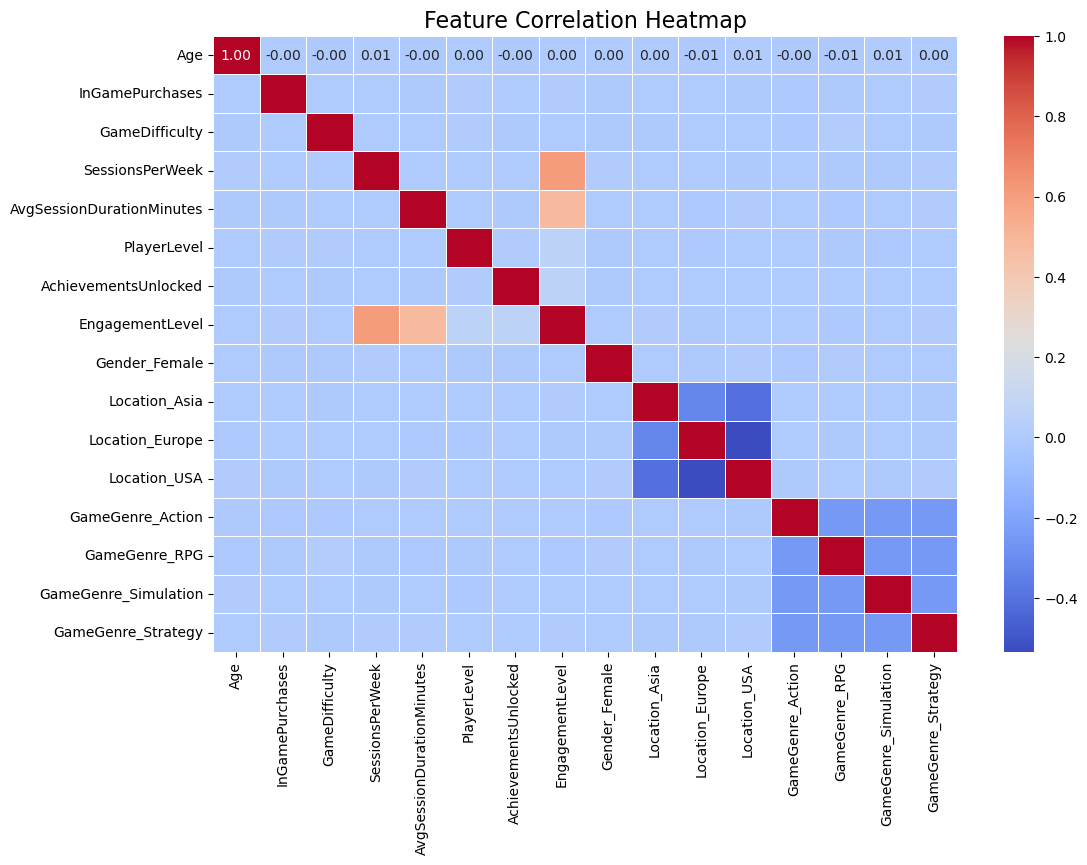

In [7]:
## Creates a correlation matrix as part of our EDA
corr_matrix = gaming_df.corr()

plt.figure(figsize=(12, 8))

# Draw the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add title for better readability
plt.title('Feature Correlation Heatmap', fontsize=16)

# Show the heatmap
plt.show()

### Important notes: it appears that none of the columns (discluding one hot encoded columns with themselves)
### are correlated with eachother AT ALL, except for engagementlevel with SessionsPerWeek and AvgSessionDurationMinutes
### Big red flag.

In [8]:
## Splits the data into feature and target.
X,y = u.split_data(gaming_df)

In [9]:
### Just one example of how we resampled and scaled the data.
### We also used many other models such as cluster centroids, SMOTE, RandomOverSampling
### And RandomUnderSampling. We removed the others as not to clutter the notebook.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

### Create and apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Create and apply SMOTEEN to scaled features and training y data
smoteenn = RandomOverSampler(random_state=7)
X_resampled, y_resampled = smoteenn.fit_resample(X_train_scaled, y_train)

In [10]:
### Create a logistic regression model
lr = LogisticRegression(random_state=7,max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=7)

In [11]:
# Predictions
y_pred = lr.predict(X_test)

# Evaluation
u.eval_model(lr,X_test,y_test)

### Logistic Regression:
### All of the sampling methods were done with a random state of 7 for reproduceability
### SMOTEENN has an accuracy score of 0.197, this corresponds to choosing the minority class EVERY SINGLE TIME when we apply SMOTEENN to standardized data...
### SMOTE has an accuracy score of 0.5015, but the confusion matrix notes that it is essentially randomly guessing the classes.
### Cluster Centroids has an accuracy score of .446... worse than randomly picking
### RandomOverSampler: .491 accuracy score
### RandomUnderSampler: .498 accuracy score

Accuracy Score: 0.8028774103307024
Confusion Matrix:
[[8036    0]
 [1973    0]]
Balanced Accuracy Score: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      8036
           1       0.00      0.00      0.00      1973

    accuracy                           0.80     10009
   macro avg       0.40      0.50      0.45     10009
weighted avg       0.64      0.80      0.72     10009



c:\Conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
### Accuracies according to above cell, were all calculated manually.
accuracies_dict_lr = {'lr_base': .802,
                    'lr_base_scaled':.802,
                    'lr_SMOTEENN' : .197,
                   'lr_SMOTE': .5015,
                   'lr_Cluster Centroids': .446,
                   'lr_RandomOverSampler': .491,
                   'lr_RandomUnderSampler': .498}

In [13]:
dummy_dict = {}

In [14]:
# Create a DummyClassifier that predicts the most frequent class
dummy_clf_mfrq = DummyClassifier(strategy="most_frequent")
dummy_clf_mfrq.fit(X_train, y_train)

# Predict on test data
y_pred_dummy = dummy_clf_mfrq.predict(X_test)

# Evaluate the dummy model
u.eval_model(dummy_clf_mfrq,X_test_scaled,y_test)
dummy_dict['MostFrequentDummy'] = round(accuracy_score(y_test,y_pred_dummy),3)

Accuracy Score: 0.8028774103307024
Confusion Matrix:
[[8036    0]
 [1973    0]]
Balanced Accuracy Score: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      8036
           1       0.00      0.00      0.00      1973

    accuracy                           0.80     10009
   macro avg       0.40      0.50      0.45     10009
weighted avg       0.64      0.80      0.72     10009



c:\Conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Conda\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# Create a DummyClassifier that predicts based on class distribution
dummy_clf_stratified = DummyClassifier(strategy="stratified", random_state=7)
dummy_clf_stratified.fit(X_train, y_train)

# Predictions
y_pred_stratified = dummy_clf_stratified.predict(X_test)

# Evaluate the dummy model
u.eval_model(dummy_clf_stratified,X_test_scaled,y_test)
dummy_dict['StratifiedDummy'] = round(accuracy_score(y_test,y_pred_stratified),3)

Accuracy Score: 0.67958837046658
Confusion Matrix:
[[6401 1635]
 [1572  401]]
Balanced Accuracy Score: 0.49989217931371677
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8036
           1       0.20      0.20      0.20      1973

    accuracy                           0.68     10009
   macro avg       0.50      0.50      0.50     10009
weighted avg       0.68      0.68      0.68     10009



In [16]:
# Uniform random classifier (randomly predicts with equal probability for all classes)
dummy_uniform = DummyClassifier(strategy="uniform", random_state=7)
dummy_uniform.fit(X_train, y_train)

# Predictions
y_pred_uniform = dummy_uniform.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_uniform)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_uniform)}")
dummy_dict['UniformDummy'] = round(accuracy_score(y_test,y_pred_uniform),3)

Accuracy: 0.4996503147167549
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.50      0.62      8036
           1       0.20      0.49      0.28      1973

    accuracy                           0.50     10009
   macro avg       0.50      0.50      0.45     10009
weighted avg       0.68      0.50      0.55     10009



In [17]:
dummy_dict

{'MostFrequentDummy': 0.803, 'StratifiedDummy': 0.68, 'UniformDummy': 0.5}

In [18]:
### Merges the accuracy dict for logistic regression with the dummy dict
accuracies_dict_lr = u.merge_with_dummy(accuracies_dict_lr,dummy_dict)
accuracies_dict_lr

{'lr_base': 0.802,
 'lr_base_scaled': 0.802,
 'lr_SMOTEENN': 0.197,
 'lr_SMOTE': 0.5015,
 'lr_Cluster Centroids': 0.446,
 'lr_RandomOverSampler': 0.491,
 'lr_RandomUnderSampler': 0.498,
 'MostFrequentDummy': 0.803,
 'StratifiedDummy': 0.68,
 'UniformDummy': 0.5}

In [19]:
### To be used in graphs, shows the proportion of 0's in the test data
test_distribution = len(y_test[y_test==0])/len(y_test)
test_distribution

0.8028774103307024

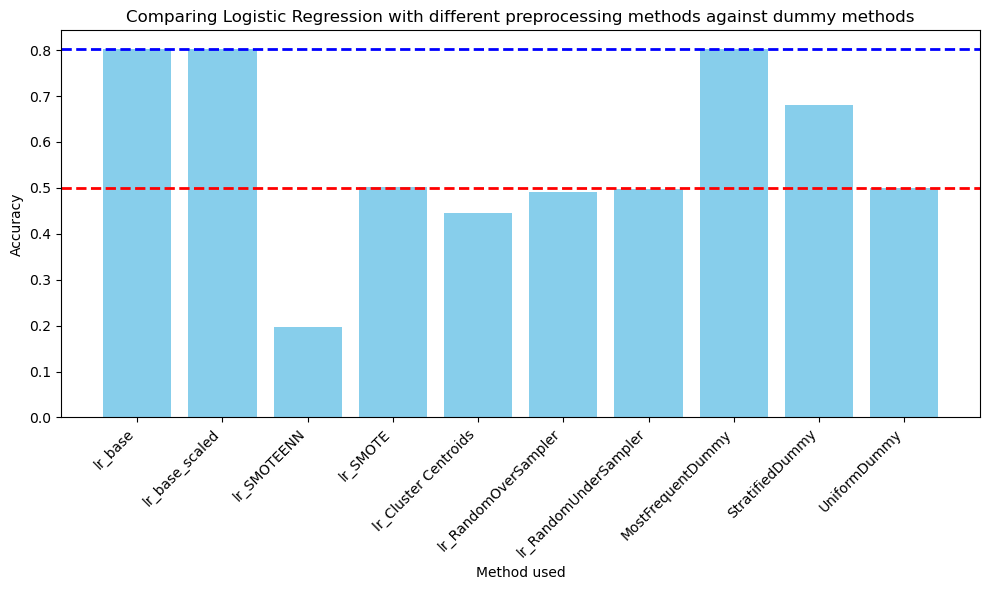

In [21]:
u.plot_accuracies(accuracies_dict_lr,'Logistic Regression',test_distribution)